In [1]:
import numpy as np
import torch
import torchvision
import dataset
import cv2
import data_augmentation
import matplotlib.pyplot as plt
import skimage
from joblib import Parallel, delayed
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [4]:
split_df = df['Image_Label'].str.split('_', n=1, expand=True)
df["Image"] = split_df[0]
df["Label"] = split_df[1]
df["encode"] = df.apply(lambda x: 1 if type(x["EncodedPixels"]) is str else 0, axis=1)
climate_df = df[["Image", "Label", "encode"]].groupby(["Image",'Label']).sum().unstack(level=1)
climate_df.columns = climate_df.columns.droplevel(level=0)

In [5]:
climate_df.head()

Label,Fish,Flower,Gravel,Sugar
Image,,,,
0011165.jpg,1,1,0,0
002be4f.jpg,1,1,0,1
0031ae9.jpg,1,1,0,1
0035239.jpg,0,1,1,0
003994e.jpg,1,0,1,1


In [43]:
A, B, C, D = train_test_split(climate_df,climate_df.values, stratify=climate_df.values)

In [41]:
a = [str(i) for i in A.values]

In [42]:
pd.Series(a).value_counts()

[1 0 1 1]    544
[0 0 1 1]    544
[0 1 0 1]    346
[1 0 0 1]    346
[0 0 0 1]    324
[0 1 0 0]    266
[0 1 1 1]    262
[1 1 0 1]    246
[1 1 0 0]    220
[0 0 1 0]    215
[1 0 0 0]    206
[1 0 1 0]    206
[1 1 1 1]    200
[1 1 1 0]    118
[0 1 1 0]    116
dtype: int64

In [25]:
a = [str(i) for i in climate_df.values]

In [36]:
pd.Series(a).value_counts()

[1 0 1 1]    726
[0 0 1 1]    726
[1 0 0 1]    462
[0 1 0 1]    462
[0 0 0 1]    432
[0 1 0 0]    355
[0 1 1 1]    349
[1 1 0 1]    328
[1 1 0 0]    294
[0 0 1 0]    287
[1 0 1 0]    274
[1 0 0 0]    274
[1 1 1 1]    266
[1 1 1 0]    157
[0 1 1 0]    154
dtype: int64

In [80]:
climate_df.sum(axis=1)

Image
0011165.jpg    2
002be4f.jpg    3
0031ae9.jpg    3
0035239.jpg    2
003994e.jpg    3
              ..
ffcedf2.jpg    1
ffd11b6.jpg    2
ffd3dfb.jpg    1
ffd6680.jpg    2
ffea4f4.jpg    1
Length: 5546, dtype: int64

In [78]:
climate_df.to_csv("20190924_climate.csv")

<BarContainer object of 4 artists>

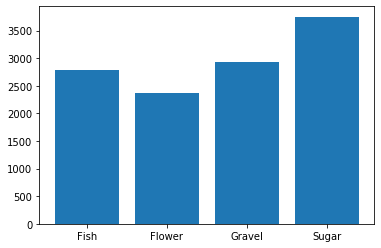

In [76]:
plt.bar(x=climate_df.sum().index, height=climate_df.sum())

In [101]:
a = torch.Tensor(np.random.rand(3))

In [102]:
a

tensor([0.7522, 0.2715, 0.0597])

In [107]:
torch.where(a < 0.5, torch.zeros(1), torch.ones(1))

tensor([1., 0., 0.])

In [105]:
torch.ones(1)

tensor([1.])

In [82]:
a_0 = np.load('inputs/image_train_color_0915/img_002be4f.npy')
a_1 = np.load('inputs/image_train_color_0915/img_0011165.npy')

In [83]:
a_0.shape

(525, 325, 3)

In [84]:
resize = data_augmentation.Resize()

In [85]:
resize = data_augmentation.Resize()
a_0 = a_0.transpose(2, 0, 1)
a_0 = resize(a_0)
a_0 = a_0.transpose(1, 2, 0)

In [86]:
a_0 /= 255

In [87]:
gamma_a_0 = skimage.exposure.adjust_gamma(a_0, gamma=0.8, gain=1)

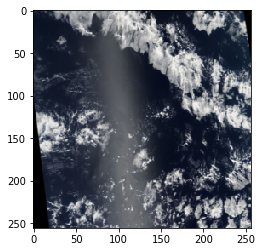

In [88]:
plt.imshow(a_0)

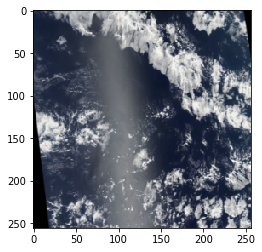

In [89]:
plt.imshow(gamma_a_0)

C:\Users\shuns\Anaconda3\envs\kaggle\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


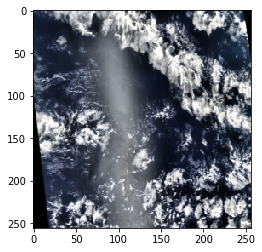

In [90]:
plt.imshow(skimage.exposure.equalize_adapthist(gamma_a_0))

In [92]:
gamma_a_0.shape

(256, 256, 3)

In [93]:
move = np.float32([[1, 0, 20], [0, 1, 20]])
image = cv2.warpAffine(gamma_a_0, move, (256, 256))

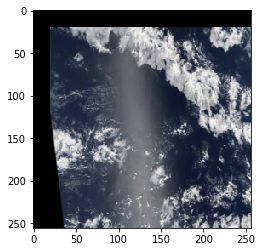

In [94]:
plt.imshow(image)

In [95]:
a_0 = np.load('inputs/mask_train_color_0915/msk_002be4f.npy')

In [96]:
resize = data_augmentation.Resize()

In [98]:
a = resize(a_0)

In [99]:
a.shape

(4, 256, 256)

In [100]:
a = a.transpose(1,2,0)
a.shape

(256, 256, 4)

In [101]:
image = cv2.warpAffine(a, move, (256, 256))

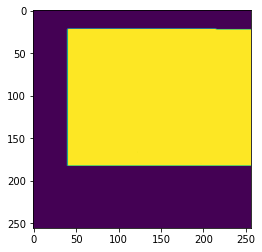

In [105]:
plt.imshow(image[:,:,0])